In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use("ggplot")
%matplotlib inline

# Simple Monte Carlo

Monte Carlo allows to approximate an integral. For instance, it's possible to estimate $\pi$ using montecarlo:

$$
A_{circle}=\pi r^2 \\
A_{square}=4 r^2 \\
P(X=1)=\frac{A_{circle}}{A_{square}}=\frac{\pi r^2}{4 r^2}=\frac{\pi}{4 }\\
\pi=4P(X=1)
$$

Let us set a random seed:

In [2]:
# Random seed
np.random.seed(0)

Simulation Parameters:

In [3]:
N=2000 # Sample size
r=1    # Radio

Function to perform simple montecarlo to estimate pi:

In [4]:
def pi_MC(N,r,visual=True):
    X=np.random.uniform(-r,r,size=(N,2))
    valid=(np.linalg.norm(X,axis=1)<=r).astype("float32")
    if visual:
        plt.figure(figsize=(6,6))
        plt.scatter(X[:,0],X[:,1],c=valid)
        plt.xlim([-r,r])
        plt.ylim([-r,r])
    return 4*np.mean(valid)

Text(0.5,1,'$\\hat \\pi=3.142000$')

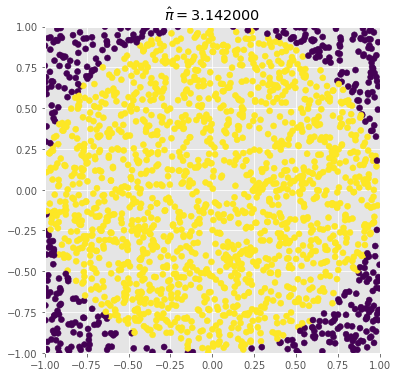

In [5]:
pi_hat=pi_MC(N,r)
plt.title(r"$\hat \pi=%6f$"%(pi_hat))

The Monte Carlo method allows us to indirectly estimate the area of the circle, which in turn is related with $\pi$. However, this method relies on the law of large numbers to provide estimations.

It's possible to observe the convergence of this example in the following figure.

In [6]:
N=np.arange(1000,100000,100)
pi_hat=np.array([pi_MC(n,1,False) for n in N])
error=np.abs((pi_hat-np.pi)/np.pi)*100

(0, 100000)

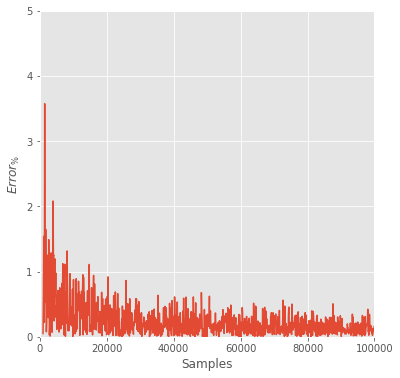

In [7]:
plt.figure(figsize=(6,6))
plt.plot(N,error)
plt.xlabel("Samples"); plt.ylabel("$Error_{\%}$")
plt.ylim([0,5])
plt.xlim([0,100000])

It's possible to solve integrals using the Monte Carlo method, for instance:

$$
Y=\int_{0}^{\infty} \frac{e^{-x}}{1+(x-1)^2}dx
$$

Let's visualize the integrand function:

In [24]:
f=lambda x: np.exp(-x)/(1+(1-x)**2)
x=np.linspace(0,10,100)
y_integrand=f(x)

(0, 10)

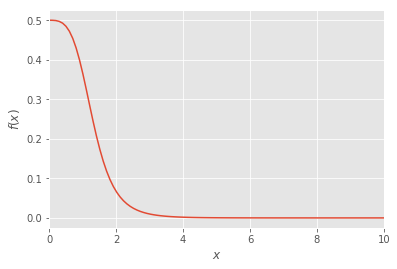

In [25]:
plt.plot(x,y_integrand)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.xlim([0,10])

It's possible to solve this problem using the Monte Carlo method. In this matter, we must reffer to the definition of average:

$$
\hat f = \frac{1}{b-a}\int_a^b f(x)dx \\
\int_a^b f(x)dx = \hat f \cdot(b-a)
$$

It's possible to rewrite this integral as follows:

$$
\hat f = \int_{-\infty}^{\infty} P(x|\theta)P(\theta)d\theta \\
P(x|\theta)=f(x)\\
P(\theta)=\left\{
            \begin{array}{ll}
              \frac{1}{b-a} \quad if \quad a \leq \theta \leq b\\
              \\ 0 \quad otherwise.
            \end{array}
          \right.
$$


In [31]:
def MC_approximation(f,interval,num=100):
    x=np.random.uniform(interval[0],interval[1],num)
    f_sample=f(x)
    return np.mean(f_sample)*(interval[1]-interval[0])

In [40]:
MC_approximation(f,(0,5),100000)

0.69647868505375465

We can corroborate this result using the trapezoidal rule as follows:

In [44]:
def numerical_approximation(f,interval=(0,5),num=100):
    f=f(np.linspace(0,5,num))
    return np.sum(f)*(interval[1]-interval[0])/num

In [45]:
numerical_approximation(f,(0,5),100000)

0.69581650583987531